In [1]:
%env ZIPLINE_ROOT=/Users/buffert/Project/git_buffert/quanter/zipline_root

env: ZIPLINE_ROOT=/Users/buffert/Project/git_buffert/quanter/zipline_root


In [2]:
#!/usr/bin/env python
#
# Copyright 2014 Quantopian, Inc.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

from zipline.api import order, record, symbol, set_benchmark
from zipline.finance import commission, slippage
import pandas as pd
import pyfolio as pf
import numpy as np
from zipline import run_algorithm
from zipline.utils.calendars import get_calendar



def initialize(context):
    context.asset = symbol('600036.SH')
    set_benchmark(symbol('600016.SH'))

    context.set_commission(commission.PerShare(cost=.00003, min_trade_cost=5.0))
    context.set_slippage(slippage.NoSlippage())


def handle_data(context, data):
    order(context.asset, 100)
    print(data.current(context.asset, ['price','open','close']))
    record(ZSYH=data.current(context.asset, 'price'))


# Note: this function can be removed if running
# this algorithm on quantopian.com
def analyze(context=None, perf=None):
    pass


/Users/buffert/Project/git_buffert/quanter/virtualenv/py3env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<string>:277: UserWarning: Overwriting bundle with name 'custom-db-bundle'


price    32.35
open     32.86
close    32.35
Name: 600036.SH, dtype: float64
price    32.22
open     32.31
close    32.22
Name: 600036.SH, dtype: float64
price    31.30
open     32.01
close    31.30
Name: 600036.SH, dtype: float64
price    30.78
open     30.74
close    30.78
Name: 600036.SH, dtype: float64
price    30.53
open     30.57
close    30.53
Name: 600036.SH, dtype: float64
price    30.66
open     30.91
close    30.66
Name: 600036.SH, dtype: float64
price    31.04
open     30.79
close    31.04
Name: 600036.SH, dtype: float64
price    31.45
open     30.98
close    31.45
Name: 600036.SH, dtype: float64
price    31.67
open     31.42
close    31.67
Name: 600036.SH, dtype: float64
price    32.36
open     31.79
close    32.36
Name: 600036.SH, dtype: float64
price    32.03
open     32.40
close    32.03
Name: 600036.SH, dtype: float64
price    32.27
open     31.88
close    32.27
Name: 600036.SH, dtype: float64
price    31.98
open     32.13
close    31.98
Name: 600036.SH, dtype: float64

2019-03-05 00:00:00+00:00    0.000000
2019-03-06 00:00:00+00:00   -0.000050
2019-03-07 00:00:00+00:00   -0.000970
2019-03-08 00:00:00+00:00   -0.001091
2019-03-11 00:00:00+00:00   -0.000802
2019-03-12 00:00:00+00:00    0.000471
2019-03-13 00:00:00+00:00    0.001855
2019-03-14 00:00:00+00:00    0.002411
2019-03-15 00:00:00+00:00    0.001487
2019-03-18 00:00:00+00:00    0.005452
2019-03-19 00:00:00+00:00   -0.002994
2019-03-20 00:00:00+00:00    0.002337
2019-03-21 00:00:00+00:00   -0.003214
2019-03-22 00:00:00+00:00    0.004369
2019-03-25 00:00:00+00:00   -0.015249
2019-03-26 00:00:00+00:00    0.004457
2019-03-27 00:00:00+00:00    0.013623
2019-03-28 00:00:00+00:00    0.001848
Freq: B, Name: returns, dtype: float64
sid                        Equity(0 [600036.SH])     cash
index                                                    
2019-03-06 00:00:00+00:00                 3222.0  96773.0
2019-03-07 00:00:00+00:00                 6260.0  93638.0
2019-03-08 00:00:00+00:00                 923

Start date,2019-03-05
End date,2019-03-28
Total months,0
,Backtest
Annual return,21.102%
Cumulative returns,1.377%
Annual volatility,8.768%
Sharpe ratio,2.23
Calmar ratio,13.84
Stability,0.32
Max drawdown,-1.525%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,1.52,2019-03-22,2019-03-25,2019-03-27,4
1,0.39,2019-03-18,2019-03-21,2019-03-22,5
2,0.29,2019-03-05,2019-03-11,2019-03-14,8
3,NaN,NaT,NaT,NaT,NaN
4,NaN,NaT,NaT,NaT,NaN


Stress Events,mean,min,max
New Normal,0.08%,-1.52%,1.36%


Top 10 long positions of all time,max
600036.SH,54.53%


Top 10 short positions of all time,max


Top 10 positions of all time,max
600036.SH,54.53%


/Users/buffert/Project/git_buffert/quanter/virtualenv/py3env/lib/python3.5/site-packages/scipy/stats/stats.py:1832: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: slice indices must be integers or None or have an __index__ method

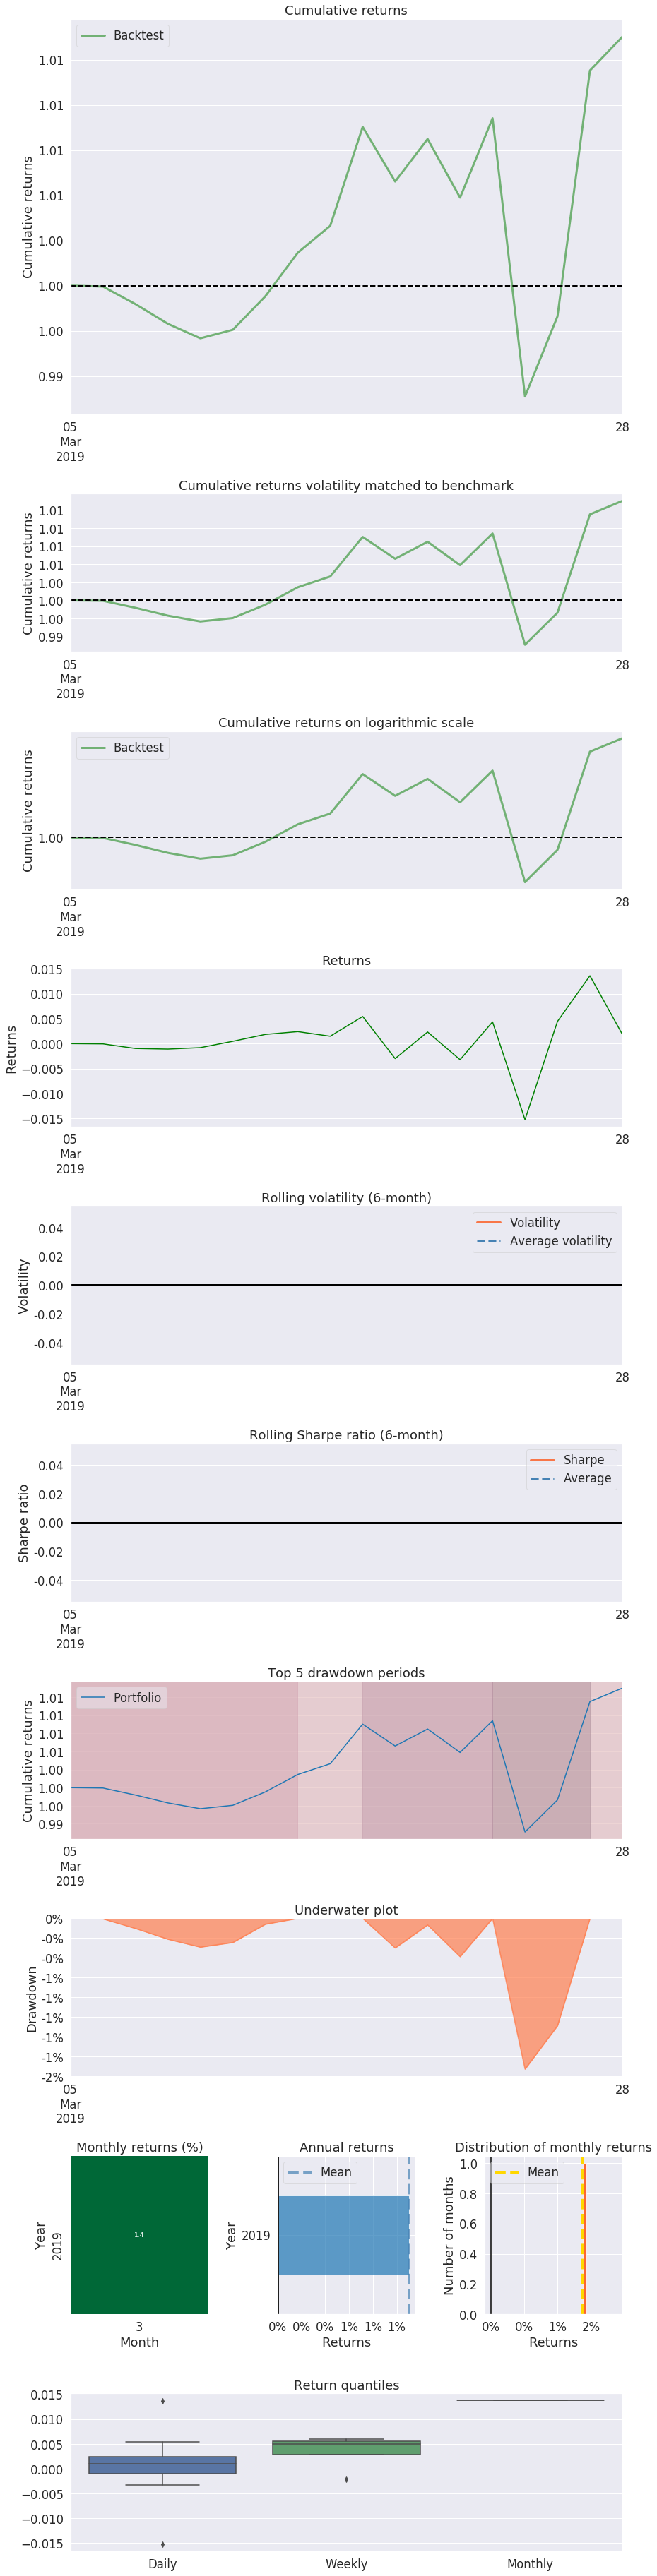

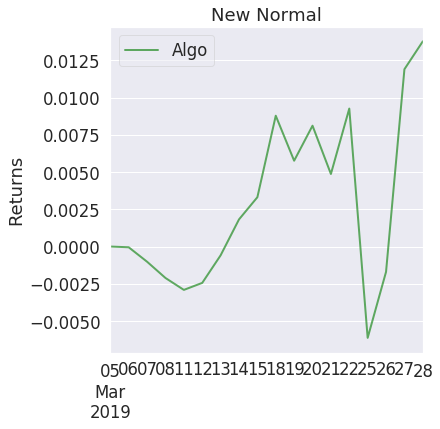

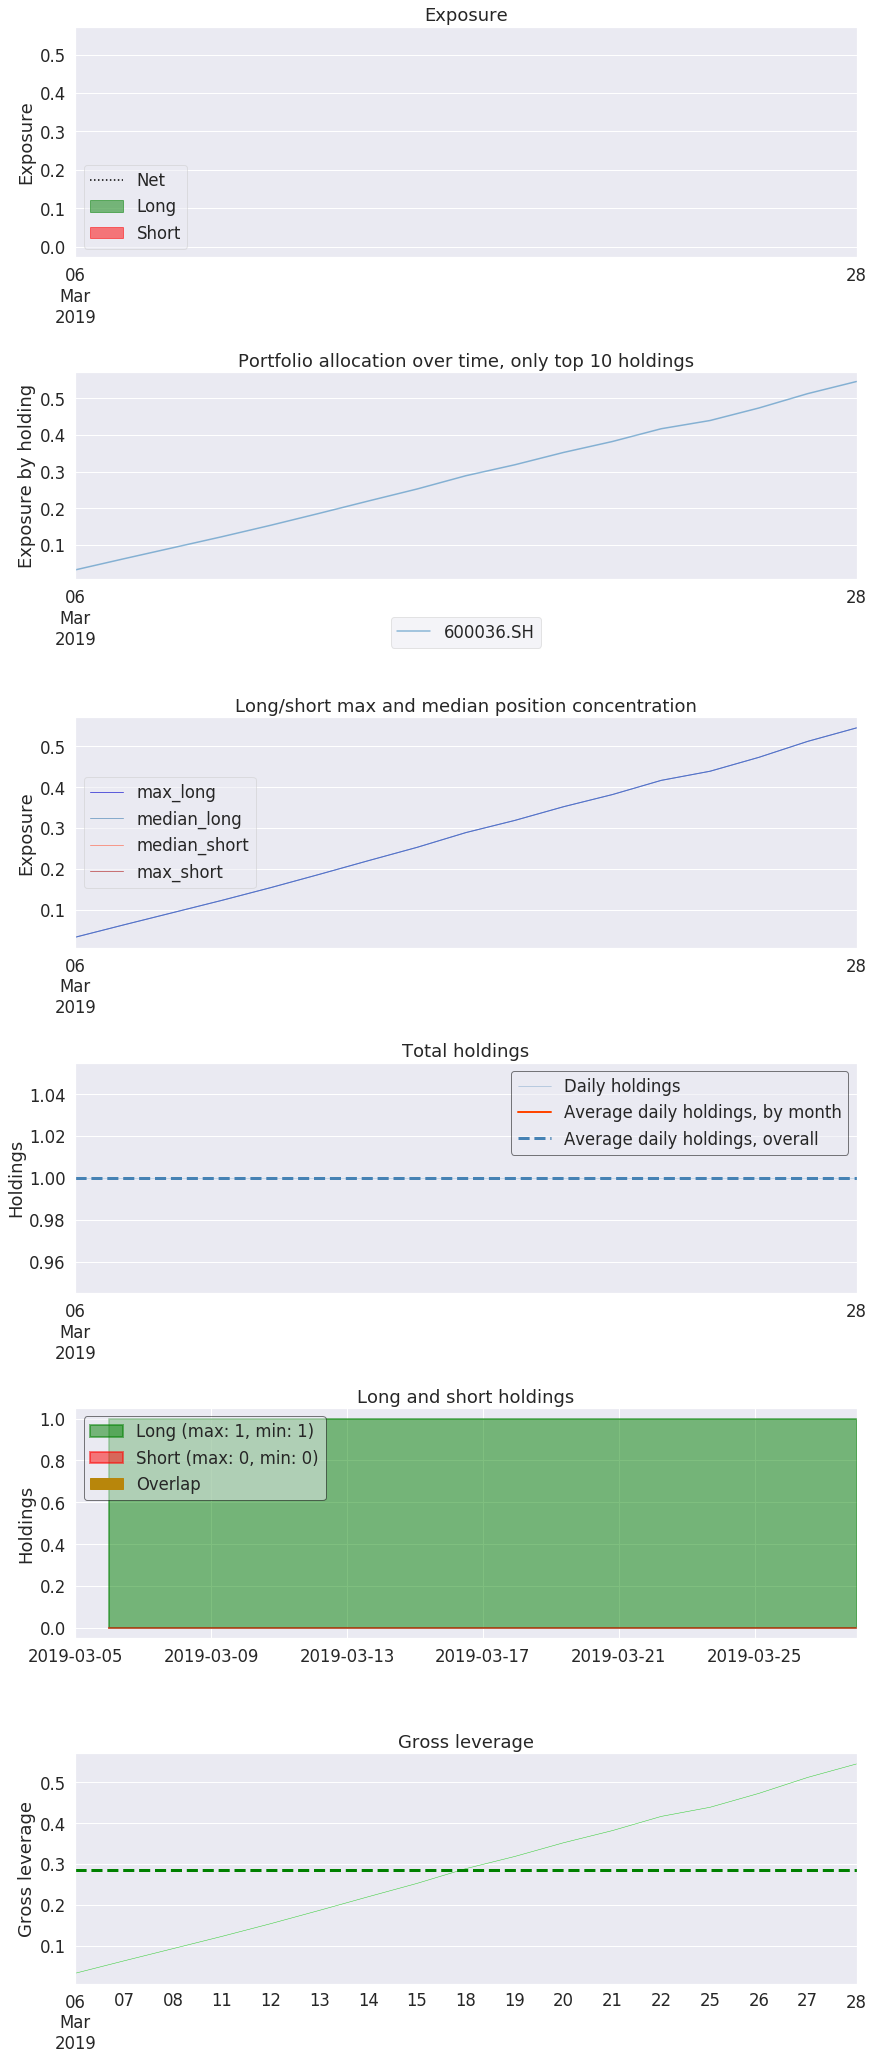

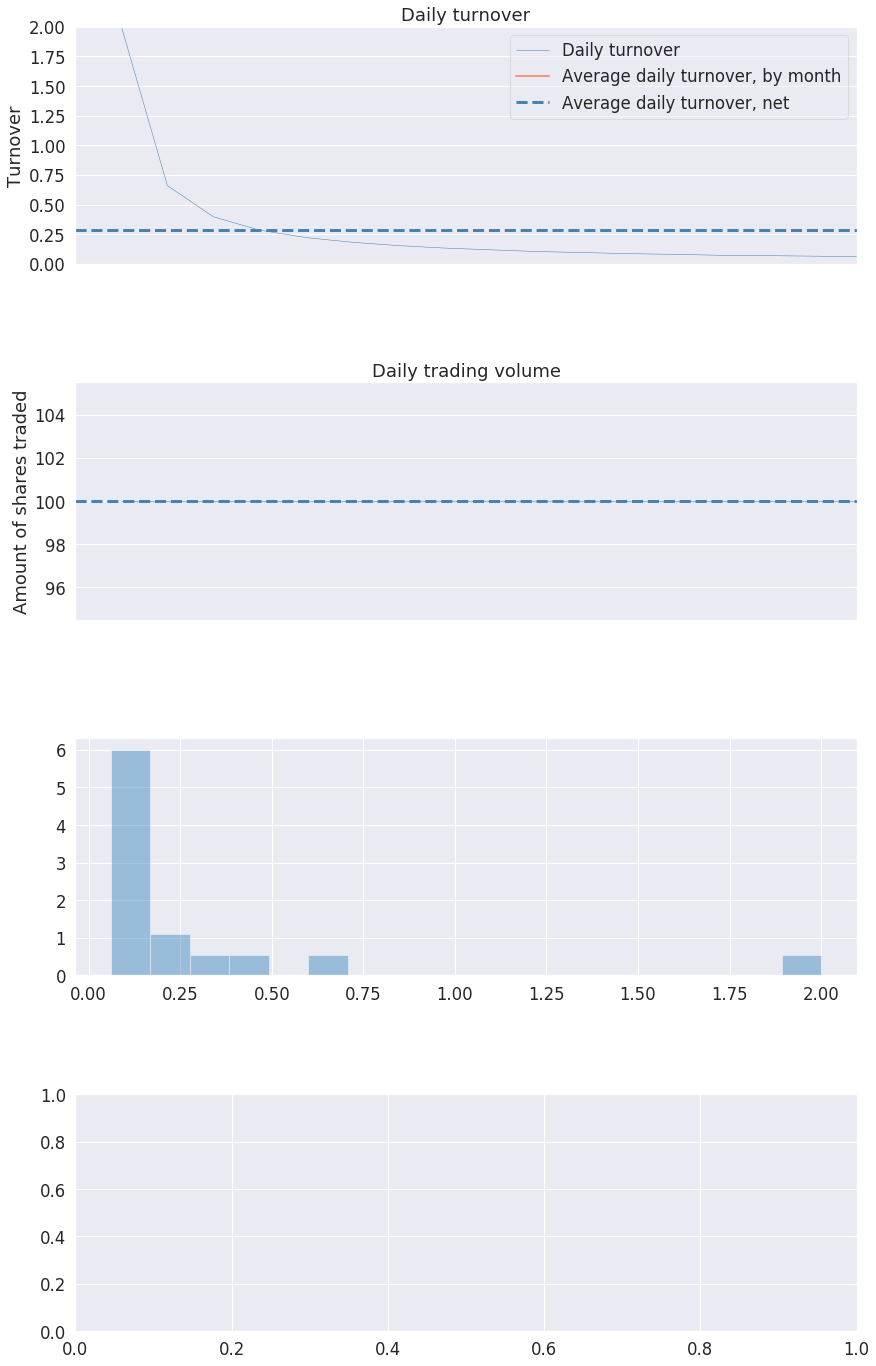

In [3]:
if __name__ == '__main__':
    # start date
    start_date = pd.Timestamp('2019-03-05', tz='Asia/Shanghai')
    # end date
    end_date = pd.Timestamp('2019-03-29', tz='Asia/Shanghai')
    cn_calendar = get_calendar('XSHG')

    ext_set = set(['/Users/buffert/Project/git_buffert/quanter/zipline-ext/zipline_root/extension.py'])

    perf = run_algorithm(
        start=start_date,
        end=end_date,
        capital_base=1.0e5,
        initialize=initialize,
        handle_data=handle_data,
        analyze=analyze,
        bundle='custom-db-bundle',
        data_frequency='daily',
        trading_calendar=cn_calendar,
        extensions=ext_set
    )
    print(perf)

    # Extract algo returns and benchmark returns
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)

    print(returns)
    print(positions)
    print(transactions)

    benchmark_period_return = perf['benchmark_period_return']
    print(benchmark_period_return)

    # Convert benchmark returns to daily returns
    # daily_returns = (1 + benchmark_period_return) / (1 + benchmark_period_return.shift()) - 1
    daily_benchmark_returns = np.exp(np.log(benchmark_period_return + 1.0).diff()) - 1

    print(returns)


    #pf.create_simple_tear_sheet(returns)

    # Create tear sheet
    pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions)

    print('Done')